Yeo Ying Xuan
1003835

In [66]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Exercise 1

In [10]:
df1 = pd.read_csv('data.csv', header = None)
df1.head(10)
# col[0]: feature X
# col[1]: Y value

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
5,55.142188,78.211518
6,52.211797,79.641973
7,39.299567,59.171489
8,48.105042,75.331242
9,52.550014,71.300880


## using normal equation

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

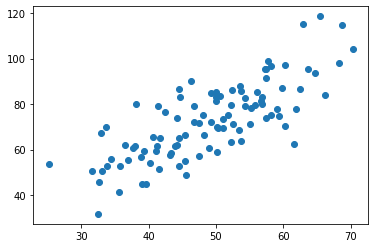

In [14]:
plt.scatter(x = df1[0], y = df1[1])

In [20]:
from scipy.stats import linregress
stats = linregress(x = df1[0], y = df1[1])

m = stats.slope
b = stats.intercept
print("equation \n y = " + str(round(m,3)) + "x + " + str(round(b,3)))

equation 
 y = 1.322x + 7.991


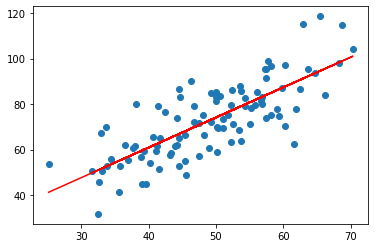

In [25]:
plt.scatter(x = df1[0], y = df1[1])
plt.plot(df1[0], m * df1[0] + b, color = "red")

## using gradient descent

In [57]:
# x = df1.loc[:, 0]
# y = df1.loc[:, 1]
# # a_dataframe.loc[:,'Numbers']
# print(type(x))
# x1 = np.array(x)
# y1 = np.array(y)
# print(type(x1))
# print(type(x2))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
def train(x, y, w):
    w += learning_rate * np.dot(x.T, (y - np.dot(x, w))) / len(x)
    y_pred = np.dot(x, w)
    loss = mean_squared_error(y_pred, y)
    return w, y_pred, loss

In [59]:
# [:, np.newaxis]
x, y = df1.loc[:,0][:, np.newaxis], df1.loc[:,1]

In [60]:
epoch = 100
learning_rate = 0.0001
w = np.zeros((1))
for i in range(epoch):
    w, y_pred, loss = train(x, y, w)
    if i % 10 == 0:
        print(f'epoch {epoch} loss : {loss}')
print(w)

epoch 100 loss : 3187.062473138781
epoch 100 loss : 122.65543791095718
epoch 100 loss : 112.70061746902573
epoch 100 loss : 112.6682789288475
epoch 100 loss : 112.66817387610577
epoch 100 loss : 112.6681735348387
epoch 100 loss : 112.6681735337301
epoch 100 loss : 112.66817353372652
epoch 100 loss : 112.66817353372647
epoch 100 loss : 112.66817353372647
[1.47948973]


In [61]:
def closed_formula(x, y):
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [62]:
w = closed_formula(x, y)
print(w)

[1.47948973]


In [65]:
mean_squared_error(np.dot(x,w), y)

112.66817353372647

## Exercise 2

In [64]:
df2 = pd.read_csv("chicago_hotel_reviews.csv")
df2

,Unnamed: 0,docid,review,rating
0,0,usa_illinois_chicago_the_talbott_hotel,\tWonderful\tI had a sore throat and the hotel...,4.672131
1,1,usa_illinois_chicago_sofitel_chicago_water_tower,Nov 20 2009 \tDidn't want to check out...\tPer...,4.601329
2,2,usa_illinois_chicago_trump_international_hotel...,\tWOW!!\tGreat hotel! Stayed there with my wif...,4.696296
3,3,usa_illinois_chicago_hampton_inn_majestic_chicago,\tStaff Went Above \tWhile waiting for our gue...,4.595455
4,4,usa_illinois_chicago_residence_inn_chicago_dow...,\tWonderful Hotel Will Definately Stay Here Ag...,4.645000
...,...,...,...,...
152,152,usa_illinois_chicago_chateau_hotel,Nov 9 2009 \tDon't Stay Here\tI live across th...,1.000000
153,153,usa_illinois_chicago_milshire_hotel,Oct 14 2009 \tBates Motel\tI've stayed at some...,1.850000
154,154,usa_illinois_chicago_abbott_hotel,Sep 21 2009 \tSlum\tNot only are the rooms jac...,1.700000
155,155,usa_illinois_chicago_skylark_motel,Feb 9 2009\tNasty business going on in this ro...,1.000000


In [74]:
vectorizer = TfidfVectorizer()
pipe = Pipeline([('tfidf', vectorizer), ('select_p', SelectPercentile(f_regression, percentile = 100)),
                ('linear regression', LinearRegression())])

x_train, x_test, y_train, y_test = train_test_split(df2.review, df2.rating, test_size = 0.2)

fit = pipe.fit(x_train, y_train)
mean_squared_error(y_test, pipe.predict(x_test))

1.4402821654354567